In [1]:
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import random
import pandas as pd 
import scipy.stats as stats
import sklearn
%matplotlib inline 
sns.set()

In [2]:
cereals = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/DataAnalytics/main/dataset/Cereals_data/cereals.CSV")

In [3]:
cereals.head(5)

,Name,Manuf,Type,Calories,Protein,Fat,Sodium,Fiber,Carbo,Sugars,...,Weight,Cups,Rating,Cold,Nabisco,Quaker,Kelloggs,GeneralMills,Ralston,AHFP
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6.0,...,1.0,0.33,68.402973,1,1,0,0,0,0,0
1,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,...,1.0,1.00,33.983679,1,0,1,0,0,0,0
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,...,1.0,0.33,59.425505,1,0,0,1,0,0,0
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,...,1.0,0.50,93.704912,1,0,0,1,0,0,0
4,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8.0,...,1.0,0.75,34.384843,1,0,0,0,0,1,0


In [4]:
cereals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          77 non-null     object 
 1   Manuf         77 non-null     object 
 2   Type          77 non-null     object 
 3   Calories      77 non-null     int64  
 4   Protein       77 non-null     int64  
 5   Fat           77 non-null     int64  
 6   Sodium        77 non-null     int64  
 7   Fiber         77 non-null     float64
 8   Carbo         76 non-null     float64
 9   Sugars        76 non-null     float64
 10  Potass        75 non-null     float64
 11  Vitamins      77 non-null     int64  
 12  Shelf         77 non-null     int64  
 13  Weight        77 non-null     float64
 14  Cups          77 non-null     float64
 15  Rating        77 non-null     float64
 16  Cold          77 non-null     int64  
 17  Nabisco       77 non-null     int64  
 18  Quaker        77 non-null     in

In [5]:
cereals.describe()

,Calories,Protein,Fat,Sodium,Fiber,Carbo,Sugars,Potass,Vitamins,Shelf,Weight,Cups,Rating,Cold,Nabisco,Quaker,Kelloggs,GeneralMills,Ralston,AHFP
count,77.000000,77.000000,77.000000,77.000000,77.000000,76.000000,76.000000,75.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.802632,7.026316,98.666667,28.246753,2.207792,1.029610,0.821039,42.665705,0.961039,0.077922,0.103896,0.298701,0.285714,0.103896,0.012987
std,19.484119,1.094790,1.006473,83.832295,2.383364,3.907326,4.378656,70.410636,22.342523,0.832524,0.150477,0.232716,14.047289,0.194771,0.269807,0.307127,0.460690,0.454716,0.307127,0.113961
min,50.000000,1.000000,0.000000,0.000000,0.000000,5.000000,0.000000,15.000000,0.000000,1.000000,0.500000,0.250000,18.042851,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,42.500000,25.000000,1.000000,1.000000,0.670000,33.174094,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.500000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
cereals["Name"].describe()

count             77
unique            77
top       100%_Bran 
freq               1
Name: Name, dtype: object

In [8]:
cereals["Name"] = cereals["Name"].astype('category')

In [9]:
cereals.dtypes

Name            category
Manuf             object
Type              object
Calories           int64
Protein            int64
Fat                int64
Sodium             int64
Fiber            float64
Carbo            float64
Sugars           float64
Potass           float64
Vitamins           int64
Shelf              int64
Weight           float64
Cups             float64
Rating           float64
Cold               int64
Nabisco            int64
Quaker             int64
Kelloggs           int64
GeneralMills       int64
Ralston            int64
AHFP               int64
dtype: object

In [10]:
cereals["Manuf"] = cereals["Manuf"].astype('category')
manufacturer=cereals['Manuf'].cat.categories
manufacturer

Index(['A ', 'G ', 'K ', 'N ', 'P ', 'Q ', 'R '], dtype='object')

In [11]:
cereals.dtypes

Name            category
Manuf           category
Type              object
Calories           int64
Protein            int64
Fat                int64
Sodium             int64
Fiber            float64
Carbo            float64
Sugars           float64
Potass           float64
Vitamins           int64
Shelf              int64
Weight           float64
Cups             float64
Rating           float64
Cold               int64
Nabisco            int64
Quaker             int64
Kelloggs           int64
GeneralMills       int64
Ralston            int64
AHFP               int64
dtype: object

In [12]:
cereals["Type"] = cereals["Type"].astype('category')
cereal_type=cereals['Type'].cat.categories
cereal_type

Index(['C ', 'H '], dtype='object')

In [13]:
pd.crosstab(cereals.Manuf, cereals.Type)

Type,C,H
Manuf,,
A,0,1
G,22,0
K,23,0
N,5,1
P,9,0
Q,7,1
R,8,0


In [14]:
cereals.isnull().sum()

Name            0
Manuf           0
Type            0
Calories        0
Protein         0
Fat             0
Sodium          0
Fiber           0
Carbo           1
Sugars          1
Potass          2
Vitamins        0
Shelf           0
Weight          0
Cups            0
Rating          0
Cold            0
Nabisco         0
Quaker          0
Kelloggs        0
GeneralMills    0
Ralston         0
AHFP            0
dtype: int64

In [15]:
cereals[cereals.isnull().any(axis=1)]

,Name,Manuf,Type,Calories,Protein,Fat,Sodium,Fiber,Carbo,Sugars,...,Weight,Cups,Rating,Cold,Nabisco,Quaker,Kelloggs,GeneralMills,Ralston,AHFP
4,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8.0,...,1.0,0.75,34.384843,1,0,0,0,0,1,0
20,Cream_of_Wheat_(Quick),N,H,100,3,0,80,1.0,21.0,0.0,...,1.0,1.00,64.533816,0,1,0,0,0,0,0
57,Quaker_Oatmeal,Q,H,100,5,2,0,2.7,NaN,NaN,...,1.0,0.67,50.828392,0,0,1,0,0,0,0


In [16]:
cereals['Carbo'] = cereals['Carbo'].fillna(cereals['Carbo'].mean())
cereals['Sugars'] = cereals['Sugars'].fillna(cereals['Sugars'].mean())
cereals['Potass'] = cereals['Potass'].fillna(cereals['Potass'].mean())

In [17]:
cereals.isnull().sum()

Name            0
Manuf           0
Type            0
Calories        0
Protein         0
Fat             0
Sodium          0
Fiber           0
Carbo           0
Sugars          0
Potass          0
Vitamins        0
Shelf           0
Weight          0
Cups            0
Rating          0
Cold            0
Nabisco         0
Quaker          0
Kelloggs        0
GeneralMills    0
Ralston         0
AHFP            0
dtype: int64

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df = cereals[['Calories', 'Fat', 'Fiber','Sugars','Rating']]
cereals_minmax = scaler.fit_transform(df)
cereals_minmax = pd.DataFrame(cereals_minmax, columns=['Calories', 'Fat', 'Fiber','Sugars','Rating'])
scaler.fit(cereals_minmax[['Calories','Fat','Fiber','Sugars','Rating']])
cereals_minmax[['Calories','Fat','Fiber','Sugars','Rating']]=scaler.transform(cereals_minmax[['Calories','Fat','Fiber','Sugars','Rating']])
cereals_minmax

,Calories,Fat,Fiber,Sugars,Rating
0,0.181818,0.2,0.714286,0.400000,0.665593
1,0.636364,1.0,0.142857,0.533333,0.210685
2,0.181818,0.2,0.642857,0.333333,0.546941
3,0.000000,0.0,1.000000,0.000000,1.000000
4,0.545455,0.4,0.071429,0.533333,0.215987
...,...,...,...,...,...
72,0.545455,0.2,0.000000,0.200000,0.278387
73,0.545455,0.2,0.000000,0.800000,0.128340
74,0.454545,0.2,0.214286,0.200000,0.419558
75,0.454545,0.2,0.214286,0.200000,0.443410


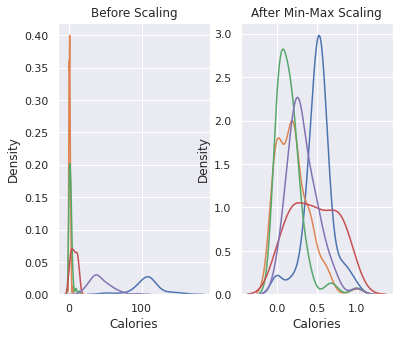

In [19]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 5))
ax1.set_title('Before Scaling')
sns.kdeplot(df['Calories'], ax=ax1)
sns.kdeplot(df['Fat'], ax=ax1)
sns.kdeplot(df['Fiber'], ax=ax1)
sns.kdeplot(df['Sugars'], ax=ax1)
sns.kdeplot(df['Rating'], ax=ax1)
ax2.set_title('After Min-Max Scaling')
sns.kdeplot(cereals_minmax['Calories'], ax=ax2)
sns.kdeplot(cereals_minmax['Fat'], ax=ax2)
sns.kdeplot(cereals_minmax['Fiber'], ax=ax2)
sns.kdeplot(cereals_minmax['Sugars'], ax=ax2)
sns.kdeplot(cereals_minmax['Rating'], ax=ax2)
plt.show()

1.3819317676582276e-15


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


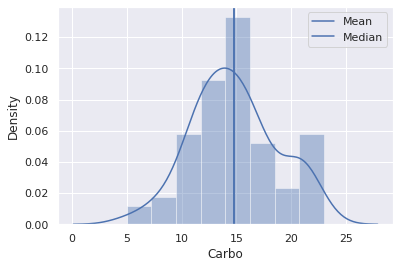

In [20]:
c_mean = np.mean(cereals['Carbo'])
c_median = np.median(cereals['Carbo'])
c_sd = np.nanstd(cereals['Carbo'])
skew =  ( 3* ( c_mean - c_median ) / ( c_sd ) )
print(skew)

f , (hist) = plt.subplots(1,sharex=True)
c_mean = np.mean(cereals['Carbo'])
c_median = np.median(cereals['Carbo'])
bins = np.sqrt(len(cereals.Carbo))
dplot = sns.distplot(cereals['Carbo'] , bins = int(bins) , ax = hist)
hist.axvline(c_mean)
hist.axvline(c_median)
plt.legend({'Mean' : c_mean , 'Median': c_median })

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


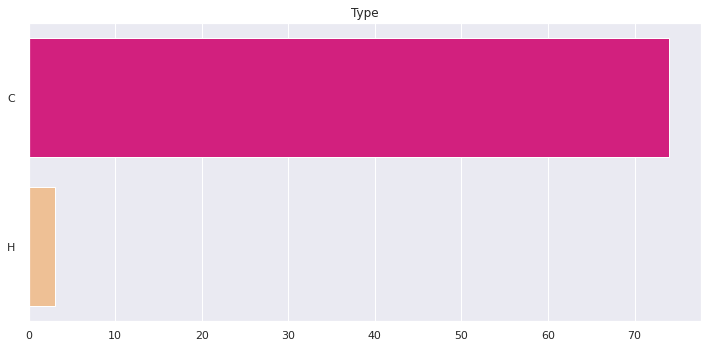

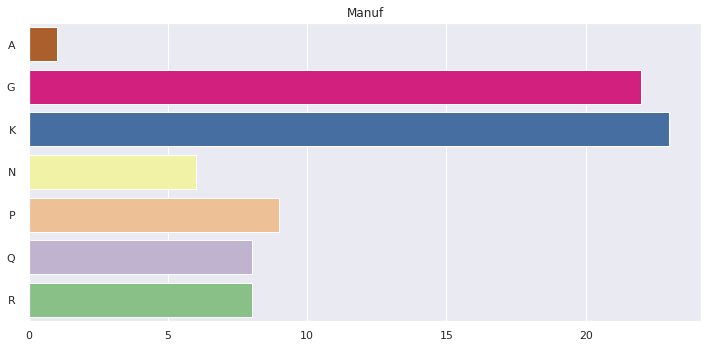

In [21]:
categorcial_variables = ['Type', 'Manuf']
for var in categorcial_variables:
    plt.figure(figsize=(10,5))
    sns.barplot(cereals[var].value_counts().values, cereals[var].value_counts().index,palette="Accent_r")
    plt.title(var)
    plt.tight_layout()

array([[<AxesSubplot:title={'center':'Calories'}>,
        <AxesSubplot:title={'center':'Protein'}>,
        <AxesSubplot:title={'center':'Fat'}>,
        <AxesSubplot:title={'center':'Sodium'}>],
       [<AxesSubplot:title={'center':'Fiber'}>,
        <AxesSubplot:title={'center':'Carbo'}>,
        <AxesSubplot:title={'center':'Sugars'}>,
        <AxesSubplot:title={'center':'Potass'}>],
       [<AxesSubplot:title={'center':'Vitamins'}>,
        <AxesSubplot:title={'center':'Shelf'}>,
        <AxesSubplot:title={'center':'Weight'}>,
        <AxesSubplot:title={'center':'Cups'}>],
       [<AxesSubplot:title={'center':'Rating'}>,
        <AxesSubplot:title={'center':'Cold'}>,
        <AxesSubplot:title={'center':'Nabisco'}>,
        <AxesSubplot:title={'center':'Quaker'}>],
       [<AxesSubplot:title={'center':'Kelloggs'}>,
        <AxesSubplot:title={'center':'GeneralMills'}>,
        <AxesSubplot:title={'center':'Ralston'}>,
        <AxesSubplot:title={'center':'AHFP'}>]], dtype=objec

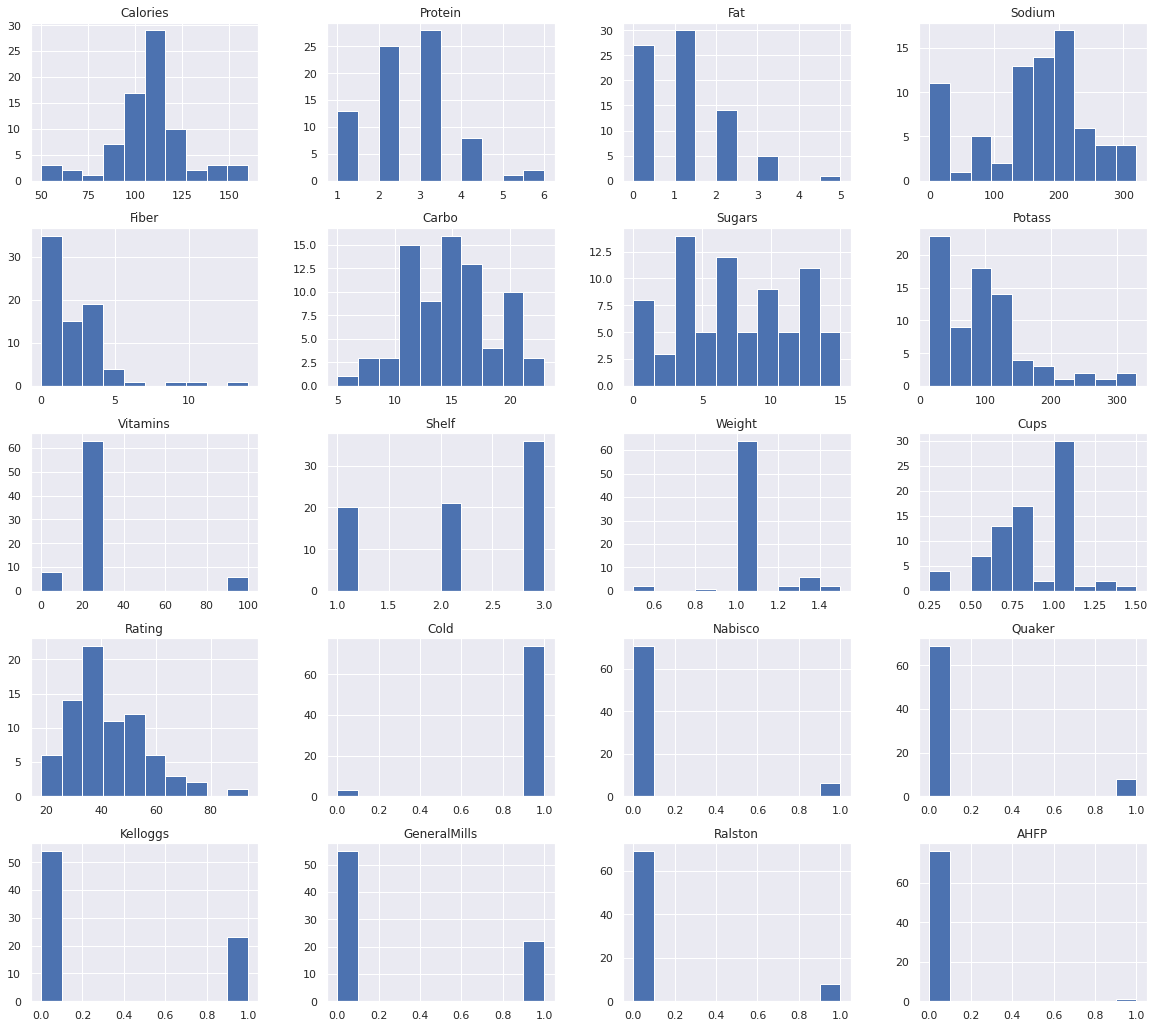

In [22]:
cereals.hist(figsize=(20, 18))

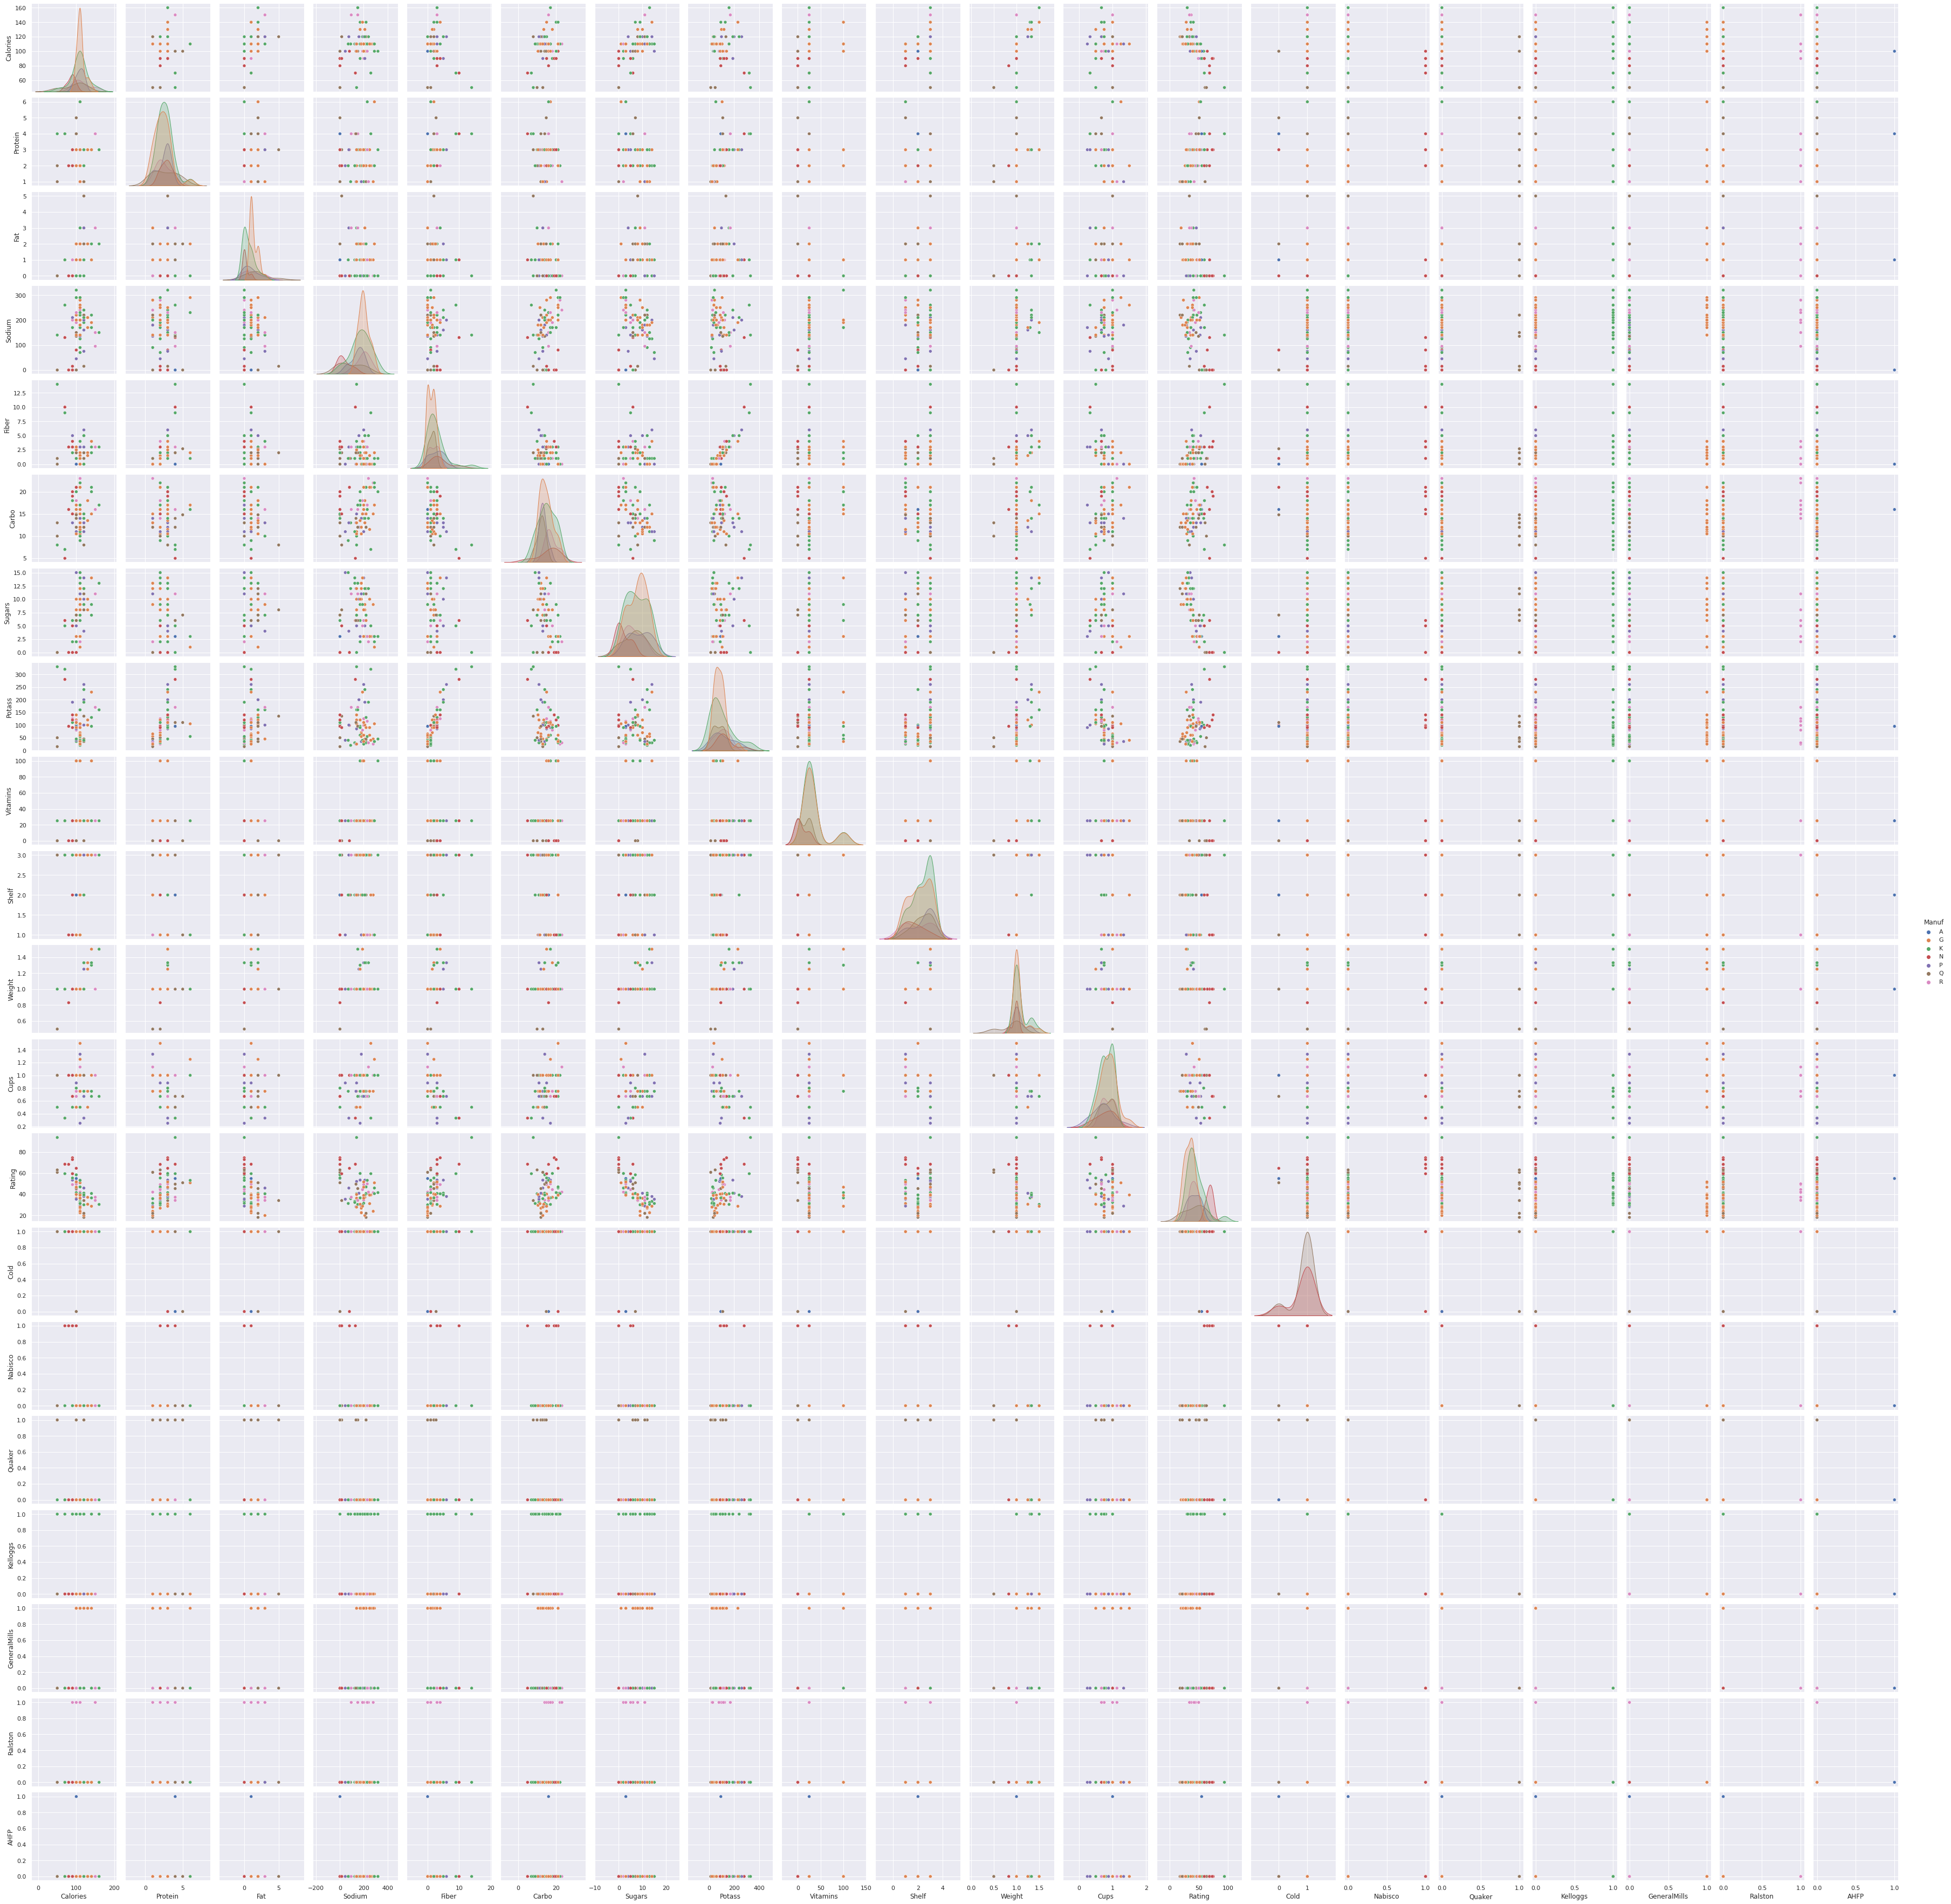

In [23]:
sns.pairplot(cereals, hue="Manuf")

In [24]:
cereals.corr(method ='pearson')

,Calories,Protein,Fat,Sodium,Fiber,Carbo,Sugars,Potass,Vitamins,Shelf,Weight,Cups,Rating,Cold,Nabisco,Quaker,Kelloggs,GeneralMills,Ralston,AHFP
Calories,1.000000,0.019066,0.498610,0.300649,-0.293413,0.257423,0.566062,-0.071991,0.265356,0.097234,0.696091,0.087200,-0.689376,0.071596,-0.303605,-0.209030,0.061110,0.146392,0.142780,-0.040788
Protein,0.019066,1.000000,0.208431,-0.054674,0.500330,-0.024160,-0.281905,0.562143,0.007335,0.133865,0.216158,-0.244469,0.470618,-0.269265,0.076942,0.024903,0.064035,-0.132155,-0.014230,0.153401
Fat,0.498610,0.208431,1.000000,-0.005407,0.016719,-0.298074,0.300552,0.197823,-0.031156,0.263691,0.214625,-0.175892,-0.409284,0.002615,-0.246047,0.250976,-0.263875,0.221789,0.080710,-0.001490
Sodium,0.300649,-0.054674,-0.005407,1.000000,-0.070675,0.290399,0.057425,-0.042312,0.361477,-0.069719,0.308576,0.119665,-0.401295,0.321552,-0.426439,-0.274636,0.118381,0.309668,0.157196,-0.219917
Fiber,-0.293413,0.500330,0.016719,-0.070675,1.000000,-0.380223,-0.138711,0.908647,-0.032243,0.297539,0.247226,-0.513061,0.584160,0.078114,0.226887,-0.117120,0.161841,-0.234842,-0.039826,-0.104249
Carbo,0.257423,-0.024160,-0.298074,0.290399,-0.380223,1.000000,-0.471184,-0.358557,0.216854,-0.189928,0.138432,0.366427,0.088513,-0.128701,0.090263,-0.249648,0.055477,-0.012359,0.249212,0.035617
Sugars,0.566062,-0.281905,0.300552,0.057425,-0.138711,-0.471184,1.000000,0.001348,0.097179,0.067411,0.455726,-0.048823,-0.762181,0.171658,-0.349331,-0.060910,0.081386,0.135850,-0.071018,-0.106875
Potass,-0.071991,0.562143,0.197823,-0.042312,0.908647,-0.358557,0.001348,1.000000,-0.005368,0.383303,0.419713,-0.499334,0.408320,-0.007455,0.162611,-0.119831,0.041382,-0.123141,0.015005,-0.006093
Vitamins,0.265356,0.007335,-0.031156,0.361477,-0.032243,0.216854,0.097179,-0.005368,1.000000,0.299262,0.320324,0.128405,-0.240544,0.180633,-0.260795,-0.241556,0.192166,0.198895,-0.049805,-0.016778
Shelf,0.097234,0.133865,0.263691,-0.069719,0.297539,-0.189928,0.067411,0.383303,0.299262,1.000000,0.190762,-0.335269,0.025159,0.131730,-0.190189,0.068836,0.110495,-0.054619,-0.085544,-0.028818


<AxesSubplot:>

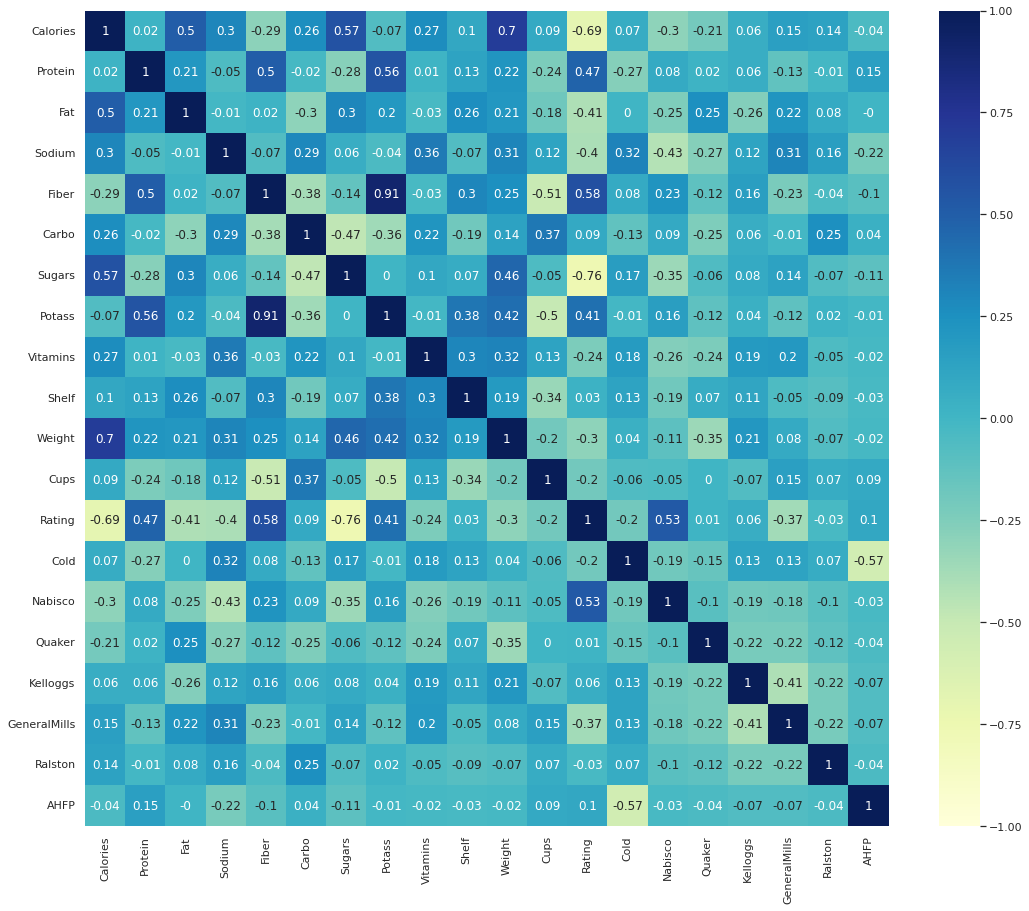

In [25]:
plt.figure(figsize=(18,15))
sns.heatmap(cereals.corr(method ='pearson').round(2), annot=True, cmap="YlGnBu", vmin=-1, vmax=1)

In [26]:
binning = [0,43,86,129,172]
types = ['Calories_under_43','Calories_under_86','Calories_under_129','Calories_under_172']
cereals['Calories_new'] = pd.cut(cereals['Calories'], binning, labels = types)
cereals['Calories_new']

0      Calories_under_86
1     Calories_under_129
2      Calories_under_86
3      Calories_under_86
4     Calories_under_129
             ...        
72    Calories_under_129
73    Calories_under_129
74    Calories_under_129
75    Calories_under_129
76    Calories_under_129
Name: Calories_new, Length: 77, dtype: category
Categories (4, object): ['Calories_under_43' < 'Calories_under_86' < 'Calories_under_129' < 'Calories_under_172']